In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Kickstarter_projects_Feb19.csv")
df.head()

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,state,country,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged
0,1687733153,Socks of Speed and Socks of Elvenkind,USD,games,Tabletop Games,2018-10-30 20:00:02,2018-11-15 17:59:00,16.0,2000.00000,Menasha,WI,US,14,7,successful,10,11,Q4,Q4,6061.00000
1,227936657,Power Punch Boot Camp: An All-Ages Graphic Novel,GBP,comics,Comic Books,2018-08-06 10:00:43,2018-09-05 10:00:43,30.0,3870.99771,Shepperton,England,GB,24,8,successful,8,9,Q3,Q3,3914.50512
2,454186436,"Live Printing with SX8: ""Squeegee Pulp Up""",USD,fashion,Apparel,2017-06-09 15:41:03,2017-07-09 15:41:03,30.0,1100.00000,Manhattan,NY,US,21,7,successful,6,7,Q2,Q3,1110.00000
3,629469071,Lost Dog Street Band's Next Album,USD,music,Country & Folk,2014-09-25 18:46:01,2014-11-10 06:00:00,45.0,3500.00000,Nashville,TN,US,15,6,successful,9,11,Q3,Q4,4807.00000
4,183973060,"Qto-X, a Tiny Lantern",USD,technology,Gadgets,2016-11-28 16:35:11,2017-01-27 16:35:11,60.0,30000.00000,Troy,MI,US,15,4,successful,11,1,Q4,Q1,40368.00000


In [28]:
df['main_category'].value_counts()

music           25850
film & video    25622
technology      19592
art             19043
publishing      18676
food            14961
games           12567
fashion         10812
comics           8168
design           7719
photography      7346
crafts           6530
theater          6451
journalism       5287
dance            3924
Name: main_category, dtype: int64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
success_cnt = df.loc[df['status'] == 'successful'].count()
failure_cnt = df.loc[df['status'] == 'failed'].count()
# print(success_cnt, failure_cnt)


## 성공한 데이터, 실패한 데이터 분리

In [7]:
successful_data = df.loc[df['status'] == 'successful']
failed_data = df.loc[df['status'] == 'failed']

In [32]:
successful_data.describe()

,id,duration,goal_usd,blurb_length,name_length,start_month,end_month,usd_pledged
count,1.173070e+05,117307.000000,117307.000000,117307.000000,117307.000000,117307.000000,117307.000000,1.173070e+05
mean,1.072633e+09,30.907550,8367.826649,18.804820,6.089065,6.519509,6.821673,2.180671e+04
std,6.200452e+08,10.656191,14209.471804,4.856147,2.662798,3.322611,3.357046,1.155032e+05
min,8.624000e+03,1.000000,0.010000,1.000000,1.000000,1.000000,1.000000,1.000000e+00
25%,5.336656e+08,28.000000,1000.000000,16.000000,4.000000,4.000000,4.000000,1.768436e+03
50%,1.076997e+09,30.000000,3500.000000,20.000000,6.000000,7.000000,7.000000,4.991520e+03
75%,1.607351e+09,32.000000,9999.394441,22.000000,8.000000,9.000000,10.000000,1.282508e+04
max,2.147476e+09,93.000000,100000.000000,35.000000,27.000000,12.000000,12.000000,8.596475e+06


## 예외 데이터 확인

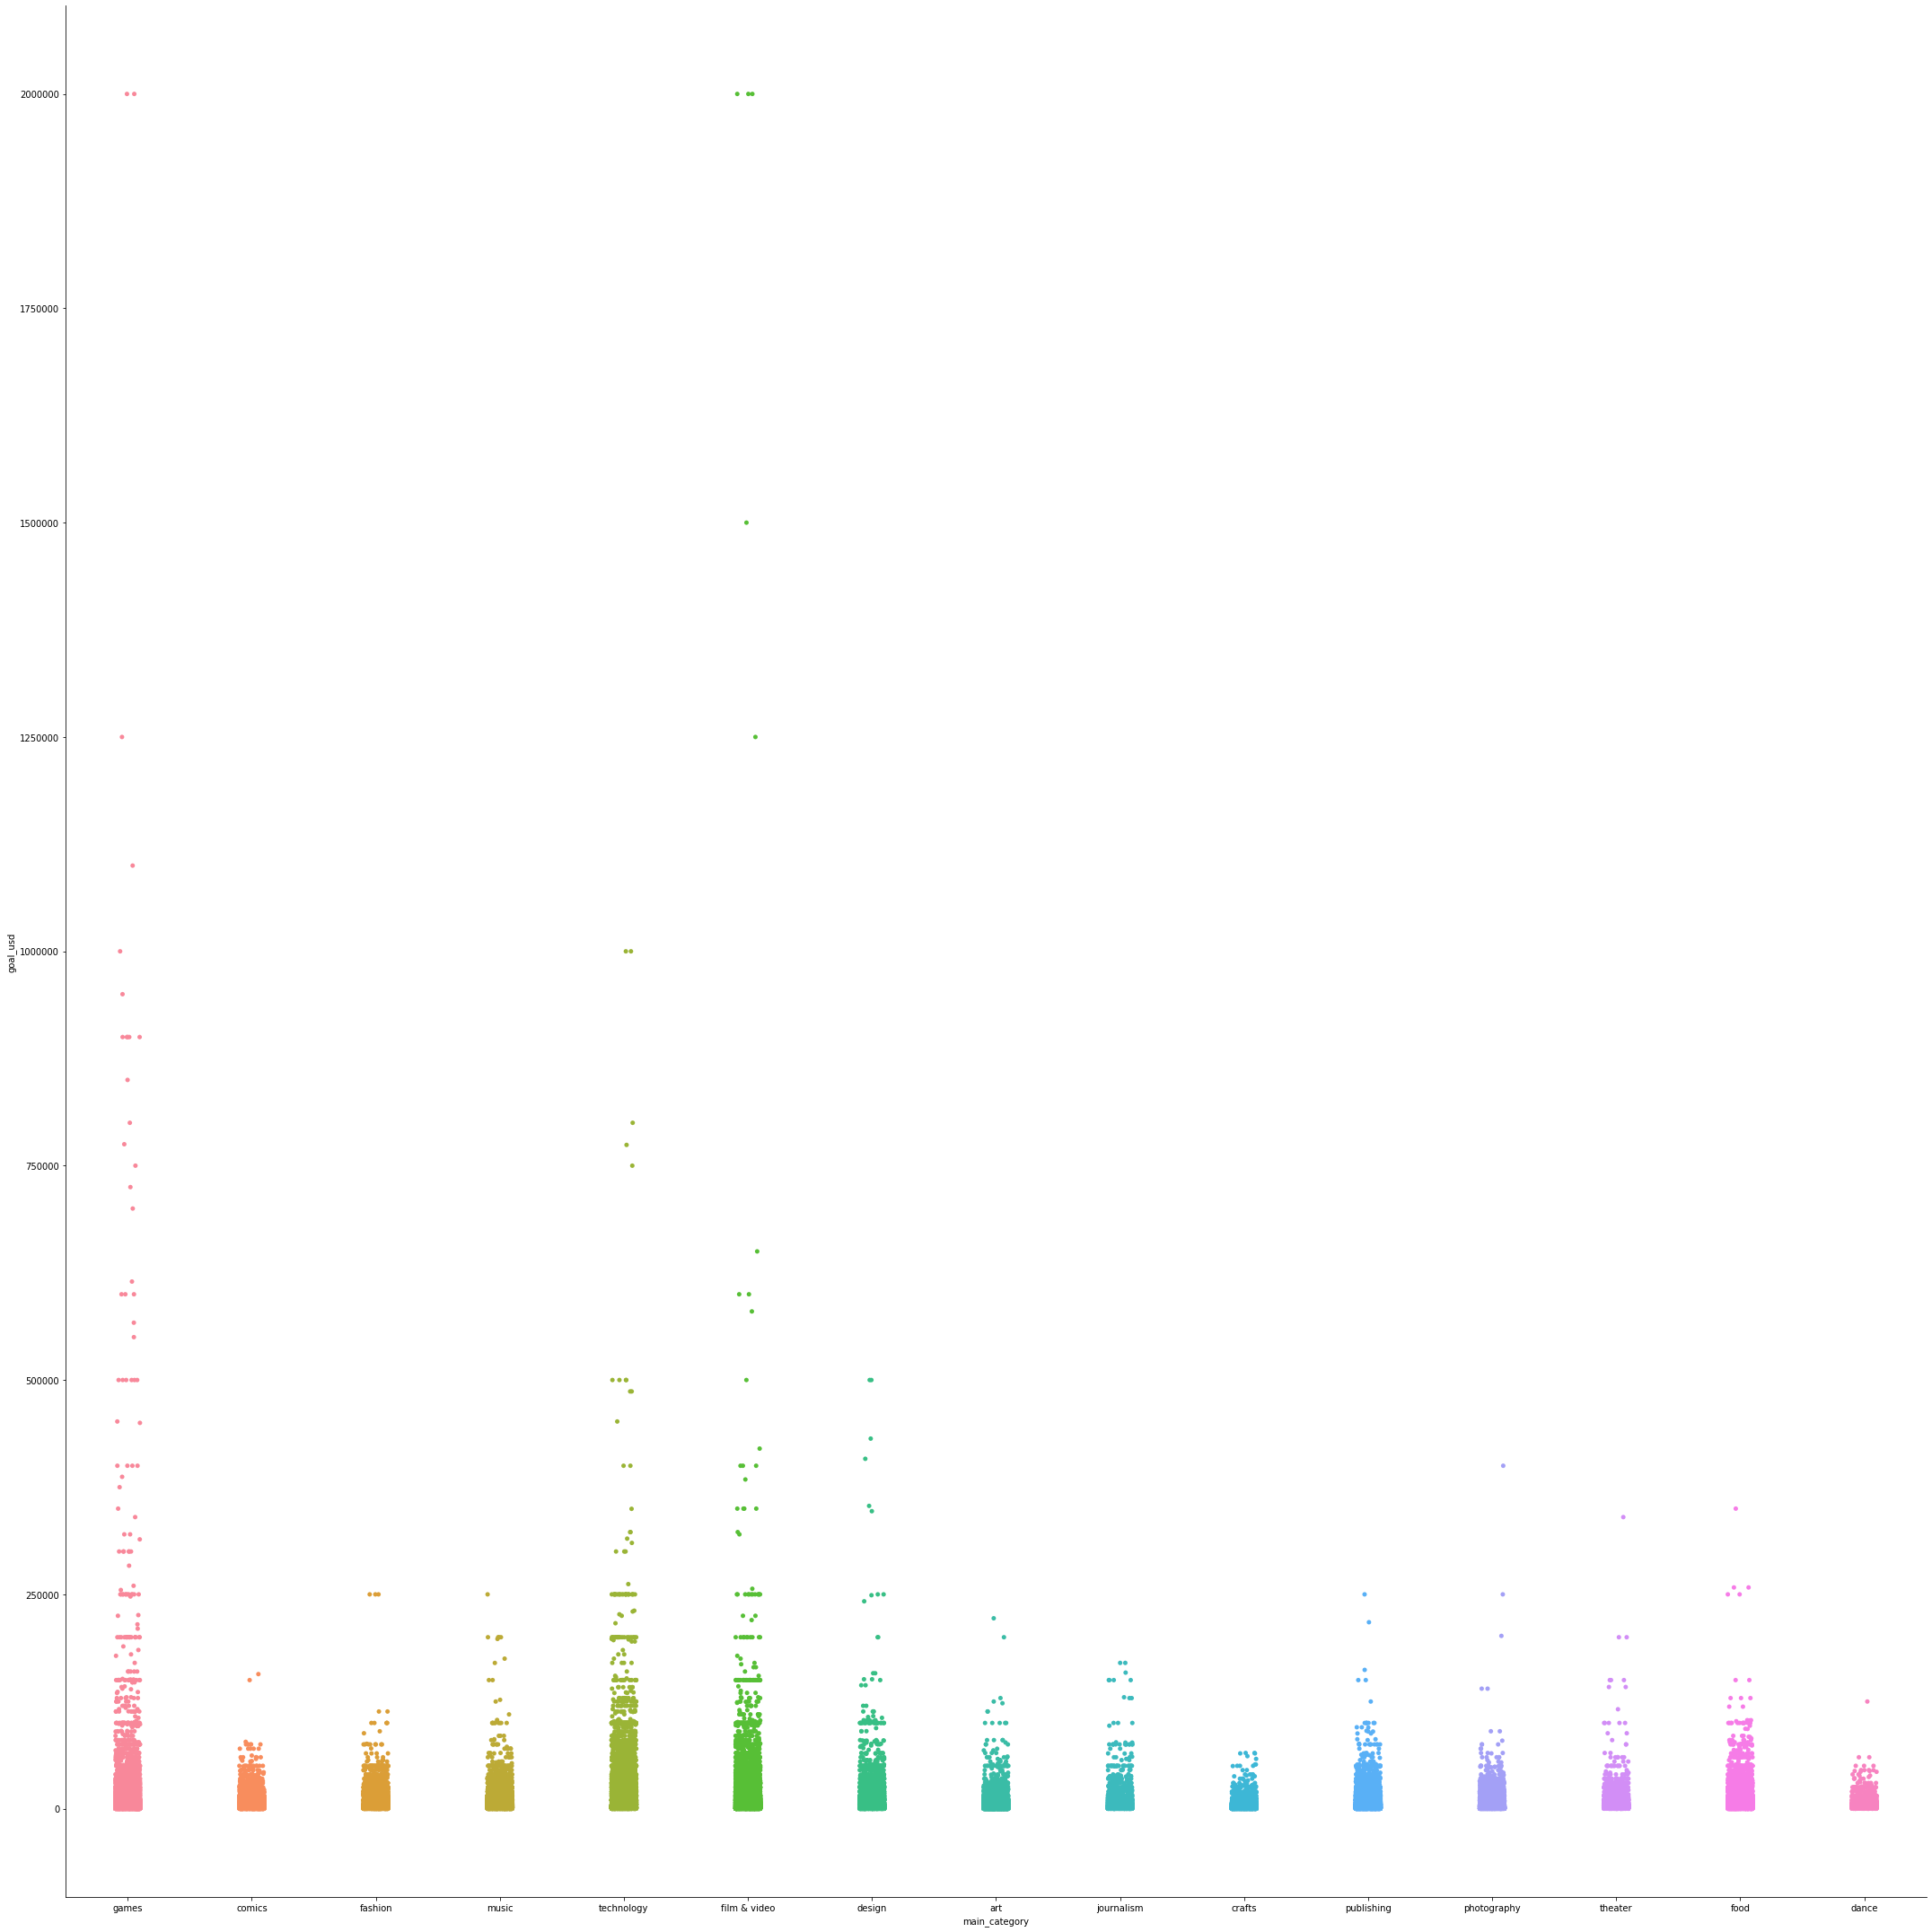

In [8]:
sns.catplot(data= successful_data, x='main_category', y='goal_usd', height = 30)

## USD 100000이상의 값은 예외의 값으로 가정
---

In [9]:
def preprocessing(data):
    data.loc[(data['goal_usd'] > 100000), 'goal_usd'] = 100000
    
    return data

## 성공한 펀딩 중 main category 별 목표금액

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


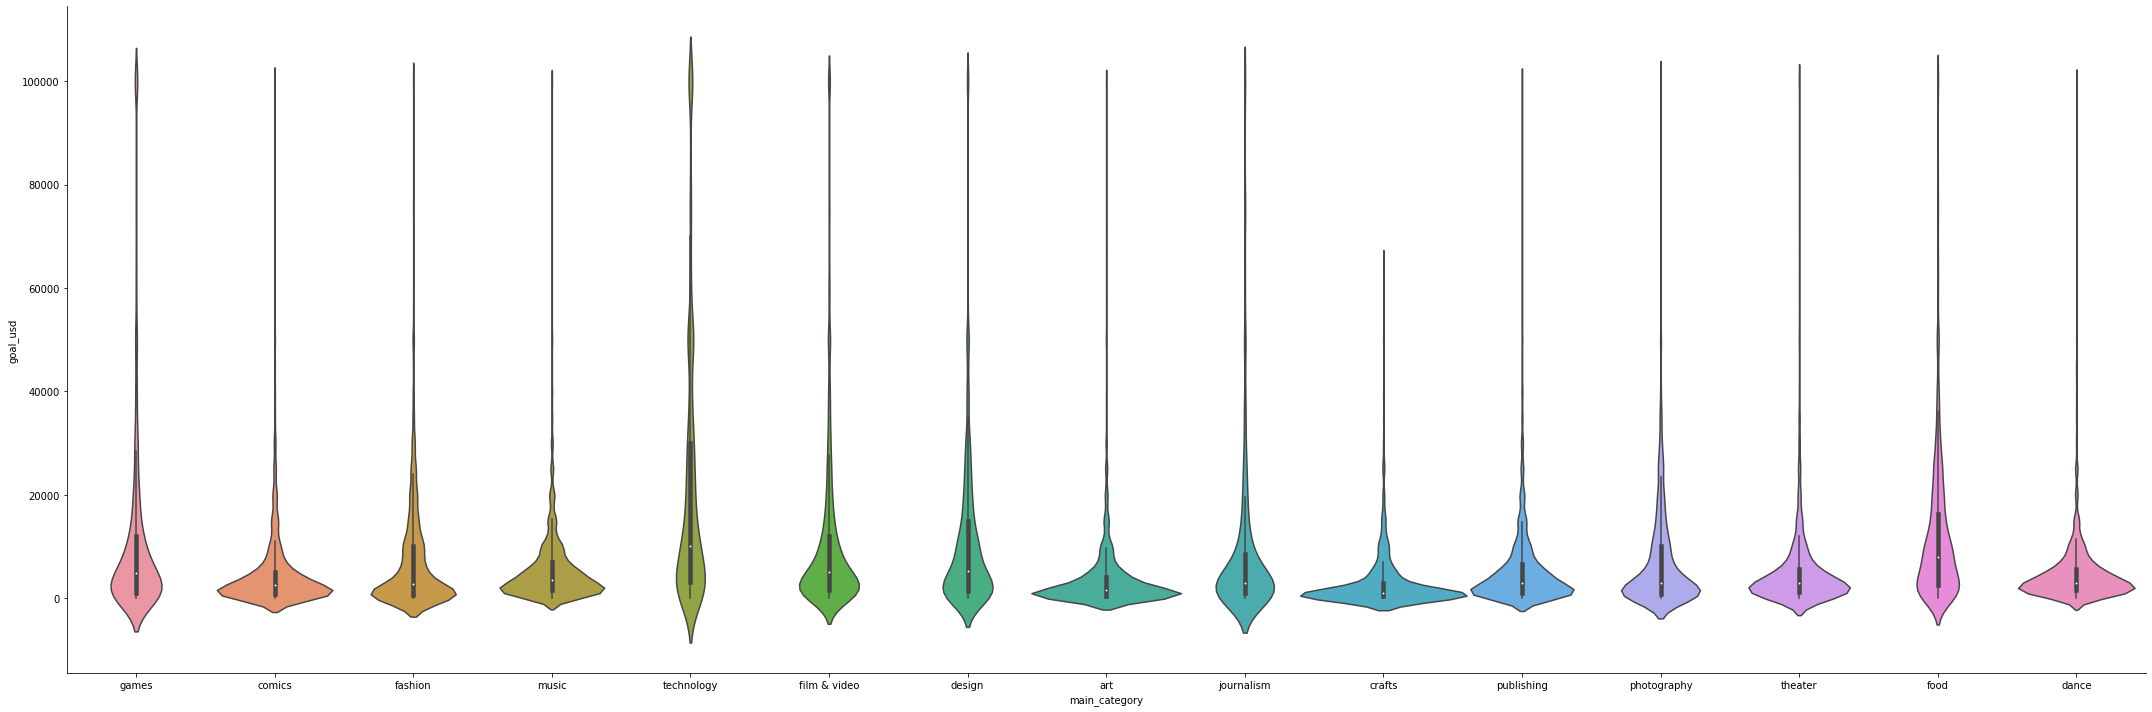

In [10]:
successful_data = preprocessing(successful_data)
failed_data = preprocessing(failed_data)

sns.catplot(data= successful_data, x='main_category', y='goal_usd', kind='violin', height = 10, aspect = 3, width = 1.2)

In [33]:
successful_data_games = successful_data.loc[successful_data['main_category'] == 'games']
successful_data_games.head()

,id,name,currency,main_category,sub_category,launched_at,deadline,duration,goal_usd,city,state,country,blurb_length,name_length,status,start_month,end_month,start_Q,end_Q,usd_pledged
0,1687733153,Socks of Speed and Socks of Elvenkind,USD,games,Tabletop Games,2018-10-30 20:00:02,2018-11-15 17:59:00,16.0,2000.000000,Menasha,WI,US,14,7,successful,10,11,Q4,Q4,6061.000000
12,140744503,Rise of the Demigods,USD,games,Tabletop Games,2018-07-30 17:03:03,2018-08-30 18:00:00,31.0,17500.000000,Chicago,IL,US,27,4,successful,7,8,Q3,Q3,45707.000000
19,125916035,Sounds from the Void - Cthulhu horror music co...,GBP,games,Tabletop Games,2018-11-13 13:09:54,2018-11-27 13:09:54,14.0,645.166285,Derby,England,GB,23,9,successful,11,11,Q4,Q4,923.210604
23,351350196,Maelstrom Rome RPG,GBP,games,Tabletop Games,2018-12-10 17:13:36,2019-01-09 17:13:36,30.0,1290.332570,North Yorkshire,England,GB,7,3,successful,12,1,Q4,Q1,2799.330408
30,228300485,Mancer,USD,games,Video Games,2019-01-11 14:01:57,2019-02-10 14:01:57,30.0,1000.000000,St. Louis,MO,US,21,1,successful,1,2,Q1,Q1,7009.000000


##  ex 1) games 카테고리 중 성공한 펀딩 사례들 목표 금액 분포

In [34]:
successful_data_games['sub_category'].value_counts()

Tabletop Games     3430
Video Games        2459
Playing Cards      1609
Mobile Games        318
Live Games          232
Gaming Hardware     169
Puzzles             108
Games                63
Name: sub_category, dtype: int64

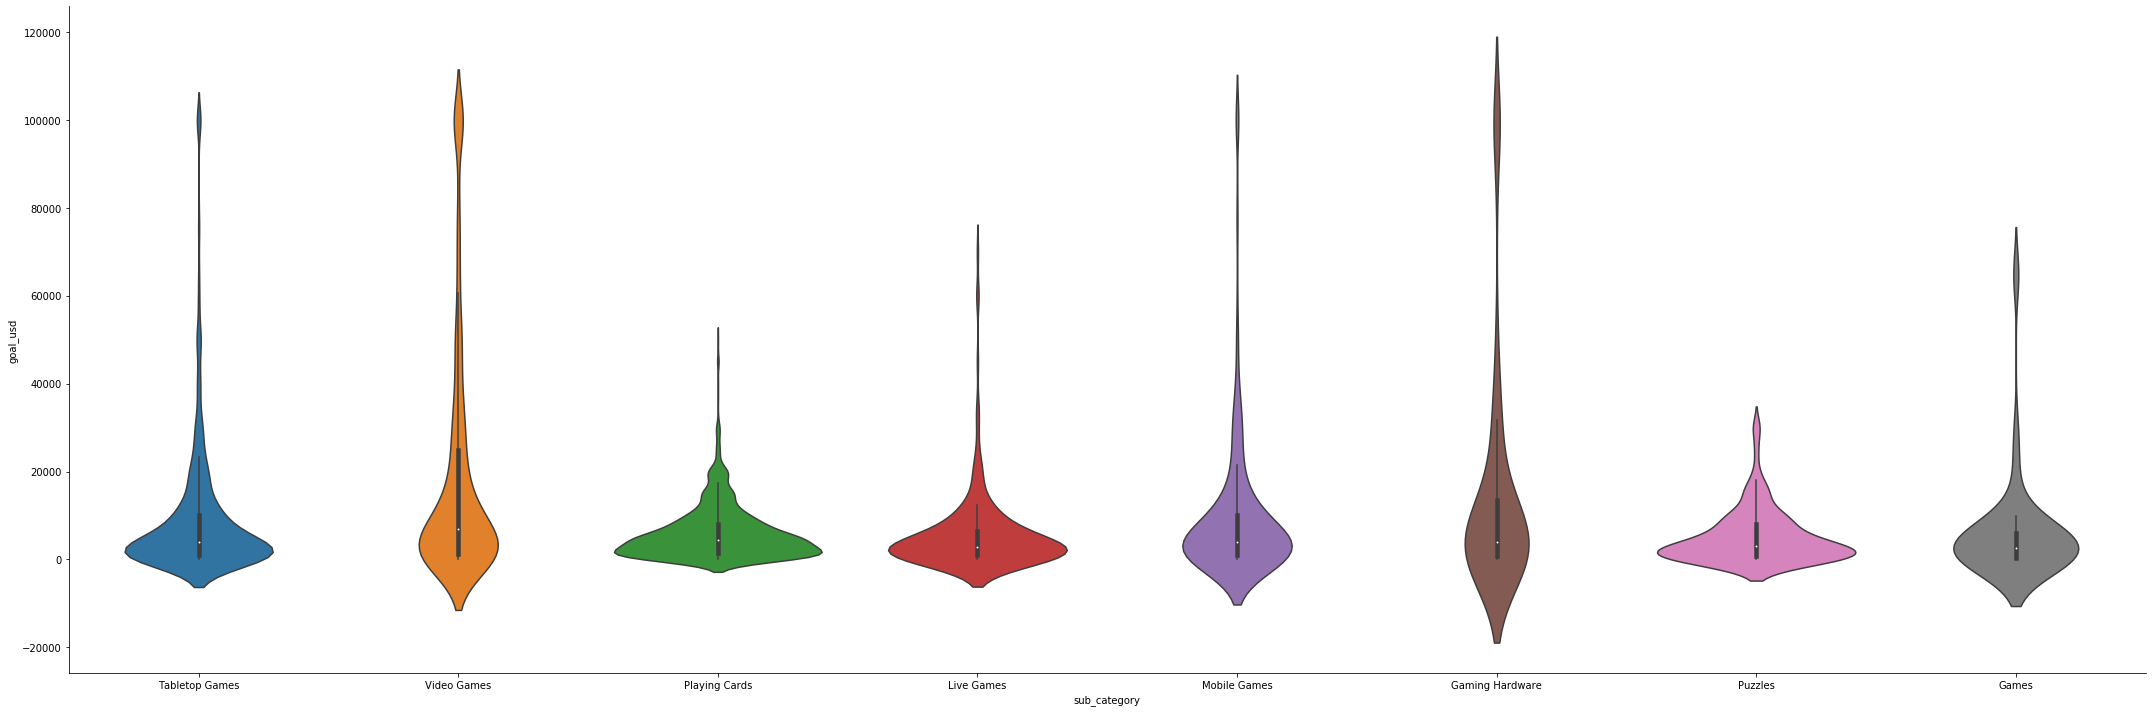

In [17]:
sns.catplot(data= successful_data_games, x='sub_category', y='goal_usd', kind='violin', height = 10, aspect = 3)

## ex 2) crafts 카네고리 중 성공한 펀딩 사례들 목표 금액 분포

In [35]:
successful_data_crafts = successful_data.loc[successful_data['main_category'] == 'crafts']

In [38]:
successful_data_crafts['sub_category'].value_counts()

Crafts         1226
Woodworking     684
DIY             417
Knitting        210
Stationery      193
Candles         133
Pottery         126
Printing        112
Glass            79
Crochet          77
Weaving          66
Embroidery       51
Quilts           40
Taxidermy        10
Name: sub_category, dtype: int64

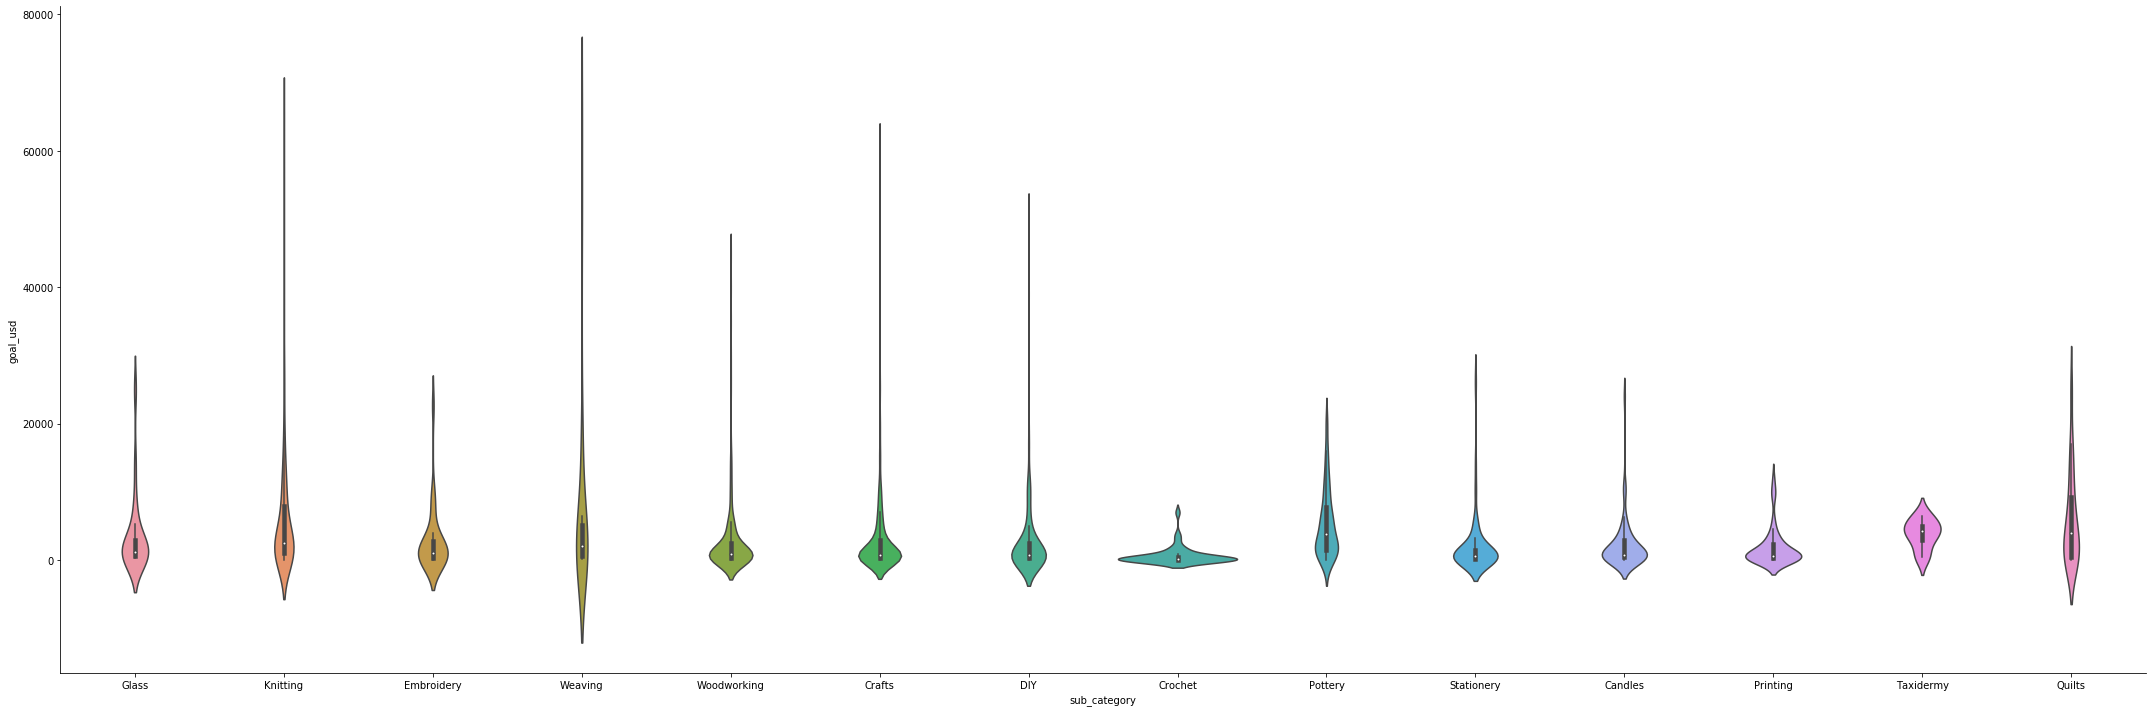

In [37]:
sns.catplot(data= successful_data_crafts, x='sub_category', y='goal_usd', kind='violin', height = 10, aspect = 3)